In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the plant function f(y) = y / (1 + y^2)
def plant_function_f(y):
    return y / (1 + y**2)

# Define the plant function g(u) = u^3
def plant_function_g(u):
    return u**3

In [9]:
class SimpleNeuralNetwork:
    def __init__(self):
        # Initialize weights and biases
        self.w1 = np.random.randn(1, 20) * 0.01
        self.b1 = np.zeros((1, 20))
        self.w2 = np.random.randn(20, 10) * 0.01
        self.b2 = np.zeros((1, 10))
        self.w3 = np.random.randn(10, 1) * 0.01
        self.b3 = np.zeros((1, 1))
        
        # Learning rate
        self.eta = 0.1
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def forward(self, x):
        # Forward pass
        self.z1 = x.dot(self.w1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = self.a1.dot(self.w2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        self.z3 = self.a2.dot(self.w3) + self.b3
        output = self.z3  # Linear output for regression
        return output
    
    def backward(self, x, y, output):
        # Backward pass
        d_output = output - y
        d_w3 = self.a2.T.dot(d_output)
        d_b3 = np.sum(d_output, axis=0, keepdims=True)
        
        d_a2 = d_output.dot(self.w3.T)
        d_z2 = d_a2 * self.sigmoid_derivative(self.z2)
        d_w2 = self.a1.T.dot(d_z2)
        d_b2 = np.sum(d_z2, axis=0, keepdims=True)
        
        d_a1 = d_z2.dot(self.w2.T)
        d_z1 = d_a1 * self.sigmoid_derivative(self.z1)
        d_w1 = x.T.dot(d_z1)
        d_b1 = np.sum(d_z1, axis=0, keepdims=True)
        
        # Update weights and biases
        self.w1 -= self.eta * d_w1
        self.b1 -= self.eta * d_b1
        self.w2 -= self.eta * d_w2
        self.b2 -= self.eta * d_b2
        self.w3 -= self.eta * d_w3
        self.b3 -= self.eta * d_b3
    
    def train(self, x, y):
        output = self.forward(x)
        self.backward(x, y, output)
        return output


In [10]:
# Initialize neural networks for f and g
N_f = SimpleNeuralNetwork()
N_g = SimpleNeuralNetwork()

# Training parameters
training_steps = 100000
learning_rate = 0.1
N_f.eta = learning_rate
N_g.eta = learning_rate

# Training the neural networks
for _ in range(training_steps):
    # Random input for y in range [-10, 10]
    y = np.random.uniform(-10, 10, (1, 1))
    f_target = plant_function_f(y)
    N_f.train(y, f_target)
    
    # Random input for u in range [-2, 2]
    u = np.random.uniform(-2, 2, (1, 1))
    g_target = plant_function_g(u)
    N_g.train(u, g_target)


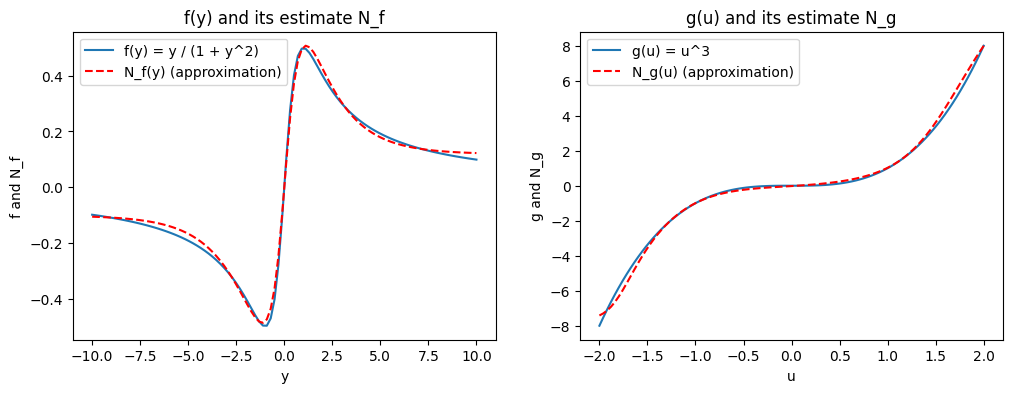

In [12]:
# Generate test data for plotting
y_vals = np.linspace(-10, 10, 100).reshape(-1, 1)
f_actual = plant_function_f(y_vals)
f_approx = np.array([N_f.forward(y) for y in y_vals]).flatten()

u_vals = np.linspace(-2, 2, 100).reshape(-1, 1)
g_actual = plant_function_g(u_vals)
g_approx = np.array([N_g.forward(u) for u in u_vals]).flatten()

# Plot f(y) and N_f(y)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(y_vals, f_actual, label='f(y) = y / (1 + y^2)')
plt.plot(y_vals, f_approx, 'r--', label='N_f(y) (approximation)')
plt.xlabel('y')
plt.ylabel('f and N_f')
plt.title('f(y) and its estimate N_f')
plt.legend()

# Plot g(u) and N_g(u)
plt.subplot(1, 2, 2)
plt.plot(u_vals, g_actual, label='g(u) = u^3')
plt.plot(u_vals, g_approx, 'r--', label='N_g(u) (approximation)')
plt.xlabel('u')
plt.ylabel('g and N_g')
plt.title('g(u) and its estimate N_g')
plt.legend()
plt.savefig('nf_ng_approximation.pdf', format='pdf')
plt.show()


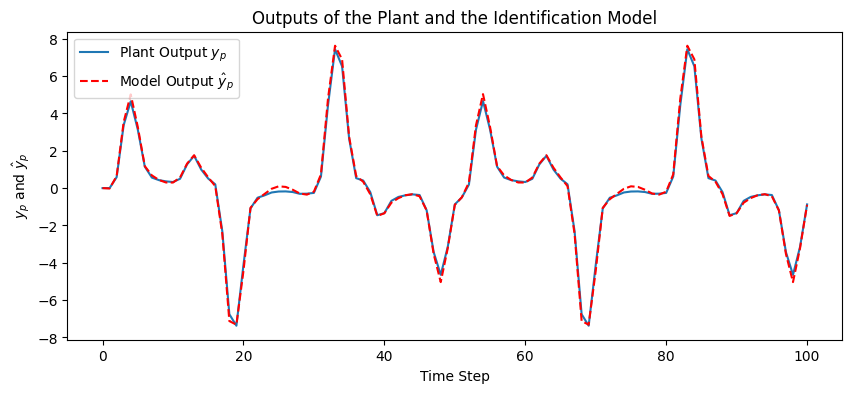

In [14]:
# Define input signal for simulation
timesteps = 100
u_vals = [np.sin(2 * np.pi * k / 25) + np.sin(2 * np.pi * k / 10) for k in range(timesteps)]

# Initialize outputs for plant and model
y_p = [0]  # Initial condition for the plant
y_hat_p = [0]  # Initial condition for the model

for u_k in u_vals:
    # Calculate plant output using f(y) and g(u)
    y_p_k = plant_function_f(y_p[-1]) + plant_function_g(u_k)
    y_p.append(y_p_k)
    
    # Calculate model output using N_f and N_g
    f_approx = N_f.forward(np.array([[y_hat_p[-1]]]))[0, 0]
    g_approx = N_g.forward(np.array([[u_k]]))[0, 0]
    y_hat_p_k = f_approx + g_approx
    y_hat_p.append(y_hat_p_k)

# Plot y_p and y_hat_p
plt.figure(figsize=(10, 4))
plt.plot(range(timesteps + 1), y_p, label='Plant Output $y_p$')
plt.plot(range(timesteps + 1), y_hat_p, 'r--', label='Model Output $\hat{y}_p$')
plt.xlabel('Time Step')
plt.ylabel('$y_p$ and $\hat{y}_p$')
plt.title('Outputs of the Plant and the Identification Model')
plt.legend()
plt.savefig('ex_2_plant_model_outputs.pdf', format='pdf')
plt.show()
